# Revised Universal Soil Loss Equation ü™ê

La RUSLE (Revised Universal Soil Loss Equation) mide:

Erosi√≥n del suelo por el agua: Espec√≠ficamente, calcula la cantidad promedio anual de suelo perdido por erosi√≥n h√≠drica superficial en un √°rea determinada. Esta cantidad se expresa generalmente en toneladas por hect√°rea por a√±o.

R (Factor de erosividad de la lluvia):
Descripci√≥n: Refleja la energ√≠a y cantidad de lluvia, relacionada con la erosi√≥n del suelo por el impacto directo de las gotas de lluvia y el escurrimiento superficial.
Unidades: MJ mm/(ha¬∑h¬∑a√±o)

K (Factor de erodabilidad del suelo):
Descripci√≥n: Representa la susceptibilidad del suelo a la erosi√≥n, teniendo en cuenta factores como textura, materia org√°nica, estructura, y permeabilidad.
Unidades: ton¬∑h/MJ¬∑mm

LS (Factor topogr√°fico):
Descripci√≥n: Combina la influencia de la longitud y la inclinaci√≥n de la pendiente en la erosi√≥n del suelo. Esencialmente, c√≥mo la topograf√≠a afecta la velocidad y cantidad de escurrimiento superficial.
Unidades: Adimensional

C (Factor de manejo del cultivo):
Descripci√≥n: Refleja el efecto de las pr√°cticas agr√≠colas en la erosi√≥n, incluyendo el tipo de cultivo, rotaci√≥n y residuos en el suelo.
Unidades: Adimensional

P (Factor de pr√°cticas de conservaci√≥n):
Descripci√≥n: Denota la efectividad de pr√°cticas espec√≠ficas de conservaci√≥n en reducir la erosi√≥n, como terrazas, franjas de cultivo y barreras.
Unidades: Adimensional

Llamado a las librer√≠as

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
!pip install rasterio
import numpy as np
from google.colab import files
import folium
import time
from tqdm import tqdm

import rasterio
from rasterio.mask import mask
from rasterio.transform import from_origin
from rasterio.warp import reproject, Resampling
from rasterio.enums import Resampling
from rasterio.plot import show as rshow
import os



     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 21.3/21.3 MB 34.1 MB/s eta 0:00:00


Exploraci√≥n de la Zona de Estudio

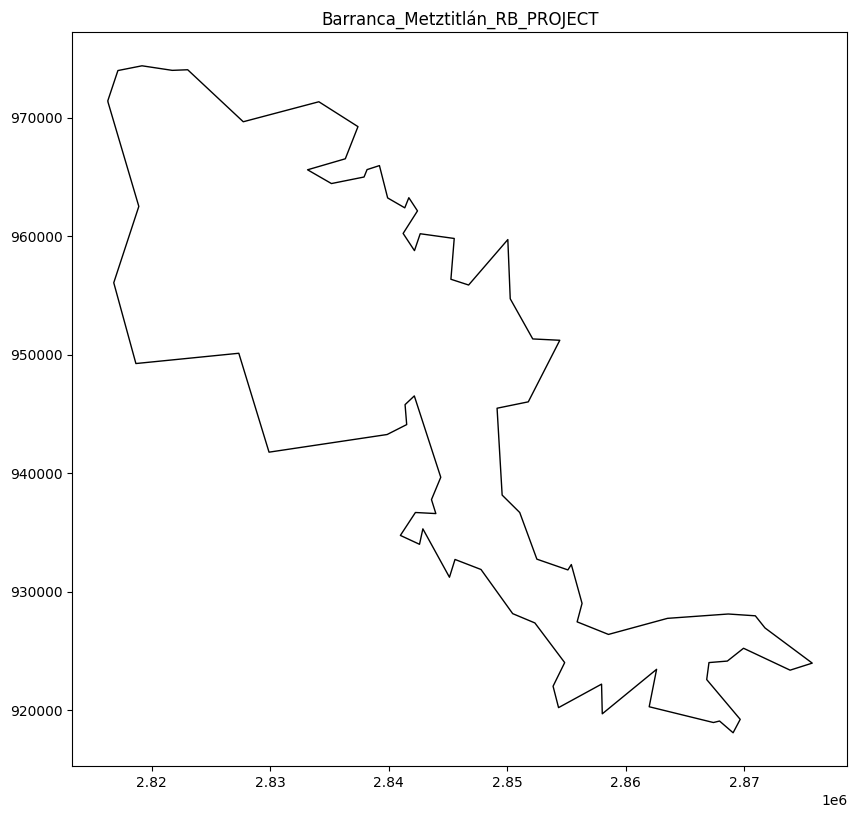

<Projected CRS: PROJCS["ITRF_1992_Lambert_Conformal_Conic",GEOGCS[ ...>
Name: ITRF_1992_Lambert_Conformal_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: International Terrestrial Reference Frame 1992
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
# Cargar el shapefile
gdf = gpd.read_file("/content/drive/MyDrive/PlaneacioÃÅn del uso de los RN/PraÃÅcticas/CAPAS_SIG/Capas/Barranca_Metztitl¬†n_RB_PROJECT.shp")

# Verificar la proyecci√≥n
crs = gdf.crs

# Visualizar el shapefile
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, edgecolor="k", facecolor="none")
ax.set_title("Barranca_Metztitl√°n_RB_PROJECT")
plt.show()

crs

# Factor R üåß

In [ ]:
#!pip install earthengine-api
#!pip install geemap

In [ ]:
import ee
ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=ar2pYf1EzD47kFI2mwsC6LRinOk03CRW4soiVtOfGsg&tc=MIcdp0L2CcHpStSCjdPJ5Dpie2amSTZTMRdMlfoOH9Q&cc=VwVS2E_wfW_snY1Iq3CEjvcT0FmpyjqA4wXPbuB4KQw

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AfJohXnL4cVe6eeyKxu8P5rAjSNTEBcEX0p9Xe4OBJvf5d7K_dOP29kzbVY

Successfully saved authorization token.


Extracci√≥n de datos de lluvia de GEE

In [ ]:
"""
The climate hazards infrared precipitation with stations‚Äîa new environmental record for monitoring extremes

"""

In [ ]:
ee.Initialize()
def generar_mapa_precipitacion(estado):
    # Definir el conjunto de datos y filtrar por fecha
    dataset = ee.ImageCollection('UCSB-CHG/CHIRPS/PENTAD').filter(ee.Filter.date('1980-01-01', '2010-01-01'))

    # Convertir los datos pentadales en datos anuales sumando todas las pentadas en un a√±o
    precipitacion_anual = dataset.sum()

    # Calcular la precipitaci√≥n media anual para el per√≠odo 2000-2023
    precipitacion_media_anual = precipitacion_anual.divide(30)

    # Obtener el l√≠mite del estado especificado en M√©xico
    limite_estado = ee.FeatureCollection('FAO/GAUL/2015/level2').filter(ee.Filter.eq('ADM1_NAME', estado))

    # Recortar los datos de precipitaci√≥n media anual al estado especificado
    precipitacion_media_anual_estado = precipitacion_media_anual.clip(limite_estado)

    # Definir los par√°metros de visualizaci√≥n
    parametros_vis = {
        'min': 0,
        'max': 2000,  # Ajusta este valor seg√∫n los valores esperados de precipitaci√≥n anual
        'palette': ['001137', '0aab1e', 'e7eb05', 'ff4a2d', 'e90000']
    }

    # Crear un mapa folium centrado en el estado especificado
    centro_estado = limite_estado.geometry().centroid().getInfo()['coordinates']
    mapa = folium.Map(location=[centro_estado[1], centro_estado[0]], zoom_start=8)

    # Funci√≥n para agregar conjuntos de datos de Earth Engine a un mapa folium
    def agregar_capa_ee(self, objeto_imagen_ee, params_vis, nombre):
        map_id_dict = ee.Image(objeto_imagen_ee).getMapId(params_vis)
        folium.raster_layers.TileLayer(
            tiles=map_id_dict['tile_fetcher'].url_format,
            attr='Datos del mapa &copy; Google Earth Engine',
            name=nombre,
            overlay=True,
            control=True
        ).add_to(self)

    # Agregar el m√©todo de dibujo de Earth Engine a folium
    folium.Map.add_ee_layer = agregar_capa_ee

    # Agregar la capa de Earth Engine al mapa folium
    mapa.add_ee_layer(precipitacion_media_anual_estado, parametros_vis, 'Precipitaci√≥n Media Anual (1980-2010) - ' + estado)

    # Agregar un panel de control de capas al mapa
    mapa.add_child(folium.LayerControl())

    # Calcular los valores m√≠nimos y m√°ximos de la capa de precipitaci√≥n media anual para el estado
    valores_min_max = precipitacion_media_anual_estado.reduceRegion(
        reducer=ee.Reducer.minMax(),
        geometry=limite_estado.geometry(),
        scale=5000,  # escala en metros
        maxPixels=1e9
    )

    valor_min = valores_min_max.get('precipitation_min').getInfo()
    valor_max = valores_min_max.get('precipitation_max').getInfo()

    print("Valor m√≠nimo de precipitaci√≥n media anual:", valor_min)
    print("Valor m√°ximo de precipitaci√≥n media anual:", valor_max)

    # Especificar los par√°metros de exportaci√≥n
    parametros_exportacion = {
        'image': precipitacion_media_anual_estado,
        'description': 'PrecipitacionMediaAnual_' + estado,
        'folder': 'CAPAS_SIG',  # Opcional. Especifica el nombre de la carpeta en tu Google Drive donde deseas guardar la imagen
        'scale': 5000,  # Escala en metros
        'region': limite_estado.geometry(),
        'maxPixels': 1e9,
        'fileFormat': 'GeoTIFF'  # Puedes elegir otros formatos como 'TFRecord'
    }

    # Iniciar el proceso de exportaci√≥n a Google Drive
    tarea = ee.batch.Export.image.toDrive(**parametros_exportacion)
    tarea.start()

    # Informar al usuario que el proceso de exportaci√≥n ha comenzado
    print(f"La exportaci√≥n de la precipitaci√≥n media anual para {estado} ha comenzado.")

    # Monitorear la tarea de exportaci√≥n
    while tarea.active():
        print('Tarea de exportaci√≥n en progreso...')
        # Espera unos segundos antes de verificar nuevamente
        time.sleep(30)

    # Verificar el estado de la tarea despu√©s de que haya dejado de estar activa
    estado = tarea.status()
    if estado['state'] == 'COMPLETED':
        print('Tarea completada exitosamente.')
    elif estado['state'] == 'FAILED':
        print('Error en la tarea:', estado['error_message'])
    else:
        print('Tarea', estado['state'])
    # Mostrar el mapa
    return mapa



In [ ]:
mapa_hidalgo = generar_mapa_precipitacion('Hidalgo')
mapa_hidalgo

Valor m√≠nimo de precipitaci√≥n media anual: 172.8434644382447
Valor m√°ximo de precipitaci√≥n media anual: 2217.97428030173
La exportaci√≥n de la precipitaci√≥n media anual para Hidalgo ha comenzado.
Tarea de exportaci√≥n en progreso...
Tarea completada exitosamente.


In [ ]:

def calculate_R(region, precipitation_raster_path):
    """
    Calcula el factor R basado en la regi√≥n y el r√°ster de precipitaci√≥n.

    Par√°metros:
    - region: Un entero que representa la regi√≥n (del 1 al 14).
    - precipitation_raster_path: Ruta al archivo r√°ster con la precipitaci√≥n media anual.

    Devoluciones:
    - R_factor_raster: Un arreglo numpy con el factor R calculado.
    """

    if region not in range(1, 15):
        raise ValueError("La regi√≥n debe estar entre 1 y 14.")

    # Abrir el raster
    with rasterio.open(precipitation_raster_path) as src:
        precipitation_data = src.read(1)

    # Ecuaciones por regi√≥n
    equations = {
        1: lambda P: 1.2078*P + 0.002276*P**2,
        2: lambda P: 3.4555*P + 0.006470*P**2,
        3: lambda P: 3.6752*P - 0.001720*P**2,
        4: lambda P: 2.8959*P + 0.002983*P**2,
        5: lambda P: 3.4880*P - 0.000188*P**2,
        6: lambda P: 6.6847*P + 0.001680*P**2,
        7: lambda P: (-0.0334)*P + 0.0061*P**2,
        8: lambda P: 1.9967*P + 0.003270*P**2,
        9: lambda P: 7.0458*P - 0.002096*P**2,
        10: lambda P: 6.8938*P + 0.000442*P**2,
        11: lambda P: 3.7745*P + 0.004540*P**2,
        12: lambda P: 2.4619*P + 0.006067*P**2,
        13: lambda P: 10.7427*P - 0.001008*P**2,
        14: lambda P: 1.5005*P + 0.002640*P**2
    }

    # Calcular R
    R_factor_raster = equations[region](precipitation_data)

    # Visualizar el raster
    plt.figure(figsize=(10, 10))
    plt.imshow(R_factor_raster, cmap='viridis')  # 'viridis' es solo una paleta de colores, puedes usar otra si prefieres
    plt.colorbar(label='Factor R')
    plt.title('Factor R basado en precipitaci√≥n')
    plt.show()

    return R_factor_raster

# Placeholder to test the function (we will test it after you provide the raster data)
"Funci√≥n definida con √©xito."


'Funci√≥n definida con √©xito.'

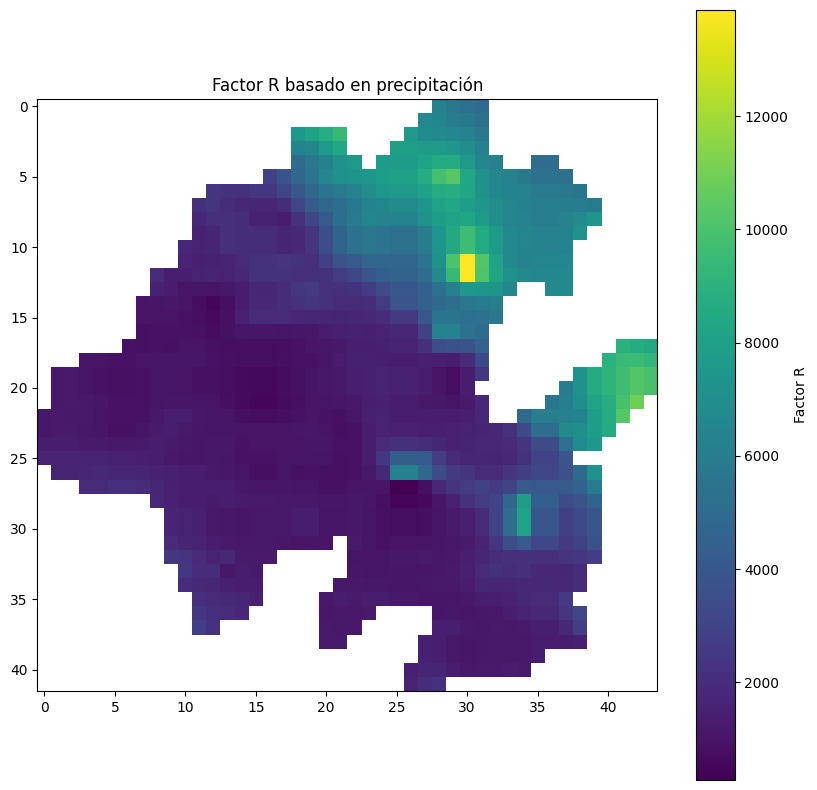

In [ ]:
# Definir la ruta del r√°ster y la regi√≥n
path_to_raster = "/content/drive/MyDrive/PlaneacioÃÅn del uso de los RN/PraÃÅcticas/CAPAS_SIG/PrecipitacionMediaAnual_Hidalgo.tif"
selected_region = 1  # Por ejemplo, para la regi√≥n 5

# Llamar a la funci√≥n
resulting_R_factor = calculate_R(selected_region, path_to_raster)


# Factor LS ‚õ∞

In [ ]:
import ee
import folium

# Inicializar Google Earth Engine
ee.Initialize()

# Definir la geometr√≠a de Hidalgo
hidalgo_geometry = ee.Geometry.Polygon(
        [[[-99.7, 20.0],
          [-99.7, 21.5],
          [-98.2, 21.5],
          [-98.2, 20.0]]])

# Cargar el DEM de Copernicus
dem = ee.ImageCollection("COPERNICUS/DEM/GLO30").mosaic().select('DEM')  # Seleccionamos la banda 'elevation'

# Recortar el DEM usando la geometr√≠a de Hidalgo
dem_hidalgo = dem.clip(hidalgo_geometry)

# Define los par√°metros de visualizaci√≥n para el DEM.
vis_params = {
    "min": 0,
    "max": 3000,
    "palette": ["white", "blue", "green", "yellow", "red"]
}

# Define una funci√≥n para visualizar las capas de datos de Earth Engine usando folium.
def add_ee_layer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)

# A√±ade el m√©todo de dibujo de Earth Engine a folium.
folium.Map.add_ee_layer = add_ee_layer

# Crea un objeto de mapa folium.
m = folium.Map(location=[20.8, -98.9], zoom_start=9)

# A√±ade la capa DEM al mapa.
m.add_ee_layer(dem_hidalgo, vis_params, 'DEM Hidalgo')

# A√±ade un panel de control de capa al mapa.
m.add_child(folium.LayerControl())

# C√≥digo para mostrar el mapa.
m


In [ ]:
import time
import ee
import folium

# Inicializar Google Earth Engine
ee.Initialize()

def generar_mapa_dem(estado):
    # Cargar el DEM de Copernicus
    dem = ee.ImageCollection("COPERNICUS/DEM/GLO30").mosaic().select('DEM')

    # Obtener el l√≠mite del estado especificado en M√©xico
    limite_estado = ee.FeatureCollection('FAO/GAUL/2015/level2').filter(ee.Filter.eq('ADM1_NAME', estado))

    # Recortar el DEM al estado especificado
    dem_estado = dem.clip(limite_estado)

    # Definir los par√°metros de visualizaci√≥n
    parametros_vis = {
        'min': 0,
        'max': 3000,  # Puedes ajustar estos valores seg√∫n el rango esperado de elevaciones en tu √°rea de inter√©s
        'palette': ["white", "blue", "green", "yellow", "red"]
    }

    # Crear un mapa folium centrado en el estado especificado
    centro_estado = limite_estado.geometry().centroid().getInfo()['coordinates']
    mapa = folium.Map(location=[centro_estado[1], centro_estado[0]], zoom_start=8)

    # Funci√≥n para agregar conjuntos de datos de Earth Engine a un mapa folium
    def agregar_capa_ee(self, objeto_imagen_ee, params_vis, nombre):
        map_id_dict = ee.Image(objeto_imagen_ee).getMapId(params_vis)
        folium.raster_layers.TileLayer(
            tiles=map_id_dict['tile_fetcher'].url_format,
            attr='Datos del mapa &copy; Google Earth Engine',
            name=nombre,
            overlay=True,
            control=True
        ).add_to(self)

    # Agregar el m√©todo de dibujo de Earth Engine a folium
    folium.Map.add_ee_layer = agregar_capa_ee

    # Agregar la capa de Earth Engine al mapa folium
    mapa.add_ee_layer(dem_estado, parametros_vis, 'DEM - ' + estado)

    # Agregar un panel de control de capas al mapa
    mapa.add_child(folium.LayerControl())

    # Especificar los par√°metros de exportaci√≥n
    parametros_exportacion = {
        'image': dem_estado,
        'description': 'DEM_' + estado,
        'folder': 'Capas',
        'scale': 30,
        'region': limite_estado.geometry(),
        'maxPixels': 1e9,
        'fileFormat': 'GeoTIFF'
    }

    # Iniciar el proceso de exportaci√≥n a Google Drive
    tarea = ee.batch.Export.image.toDrive(**parametros_exportacion)
    tarea.start()

    # Informar al usuario que el proceso de exportaci√≥n ha comenzado
    print(f"La exportaci√≥n del DEM para {estado} ha comenzado.")

    # Monitorear la tarea de exportaci√≥n
    while tarea.active():
        print('Tarea de exportaci√≥n en progreso...')
        time.sleep(30)

    # Verificar el estado de la tarea despu√©s de que haya dejado de estar activa
    estado_tarea = tarea.status()
    if estado_tarea['state'] == 'COMPLETED':
        print('Tarea completada exitosamente.')
    elif estado_tarea['state'] == 'FAILED':
        print('Error en la tarea:', estado_tarea['error_message'])
    else:
        print('Tarea', estado_tarea['state'])

    # Mostrar el mapa
    return mapa


In [ ]:
# Uso de la funci√≥n (puede tomar varios minutos)
mapa_dem = generar_mapa_dem("Hidalgo")
mapa_dem

La exportaci√≥n del DEM para Hidalgo ha comenzado.
Tarea de exportaci√≥n en progreso...
Tarea de exportaci√≥n en progreso...
Tarea de exportaci√≥n en progreso...
Tarea de exportaci√≥n en progreso...
Tarea de exportaci√≥n en progreso...
Tarea de exportaci√≥n en progreso...
Tarea de exportaci√≥n en progreso...
Tarea de exportaci√≥n en progreso...
Tarea de exportaci√≥n en progreso...
Tarea completada exitosamente.


# Factor K üíé

In [ ]:
def calcular_valores_fac_k(ruta_shapefile):
    # Leer el shapefile
    suelo_gdf = gpd.read_file(ruta_shapefile)

    # Mapear valores de la columna TEXTURA
    mapeo_textura = {
        "Fina": "F",
        "Media": "M"  # Cualquier otro valor se asume como "G"
    }
    suelo_gdf['TEXTURA_MAPEADA'] = suelo_gdf['TEXTURA'].map(lambda x: mapeo_textura.get(x, "G"))

    # Diccionario con los valores de suelo-textura
    valores_suelo = {
            "AC": {"G": 0.026, "M": 0.04, "F": 0.013},
    "AL": {"G": 0.026, "M": 0.04, "F": 0.013},
    "AN": {"G": 0.026, "M": 0.04, "F": 0.013},
    "AR": {"G": 0.013, "M": 0.02, "F": 0.007},
    "CH": {"G": 0.013, "M": 0.02, "F": 0.007},
    "CL": {"G": 0.053, "M": 0.079, "F": 0.026},
    "CM": {"G": 0.026, "M": 0.04, "F": 0.013},
    "DU": {"G": 0.053, "M": 0.079, "F": 0.026},
    "FL": {"G": 0.026, "M": 0.04, "F": 0.013},
    "FR": {"G": 0.013, "M": 0.02, "F": 0.007},
    "GL": {"G": 0.026, "M": 0.04, "F": 0.013},
    "GY": {"G": 0.053, "M": 0.079, "F": 0.026},
    "HS": {"G": 0.053, "M": 0.02, "F": 0.007},
    "KS": {"G": 0.026, "M": 0.04, "F": 0.013},
    "LP": {"G": 0.013, "M": 0.02, "F": 0.007},
    "LV": {"G": 0.026, "M": 0.04, "F": 0.013},
    "LX": {"G": 0.013, "M": 0.02, "F": 0.007},
    "NT": {"G": 0.013, "M": 0.02, "F": 0.007},
    "PH": {"G": 0.013, "M": 0.02, "F": 0.007},
    "PL": {"G": 0.053, "M": 0.079, "F": 0.026},
    "PT": {"G": 0.026, "M": 0.04, "F": 0.013},
    "RG": {"G": 0.026, "M": 0.04, "F": 0.013},
    "SC": {"G": 0.026, "M": 0.04, "F": 0.013},
    "SN": {"G": 0.053, "M": 0.079, "F": 0.026},
    "UM": {"G": 0.026, "M": 0.04, "F": 0.013},
    "VR": {"G": 0.053, "M": 0.079, "F": 0.026}
}

    # Funci√≥n para obtener el valor basado en el tipo y textura del suelo
    def obtener_valor(suelo, textura):
        if suelo in valores_suelo and textura in valores_suelo[suelo]:
            return valores_suelo[suelo][textura]
        else:
            return None

    # Calcular valores para la columna 'Fac_K'
    suelo_gdf['Fac_K'] = suelo_gdf.apply(lambda fila: obtener_valor(fila['GRUPO1'], fila['TEXTURA_MAPEADA']), axis=1)

    # Guardar el GeoDataFrame actualizado en un nuevo shapefile
    ruta_salida = ruta_shapefile.replace(".shp", "_actualizado.shp")
    suelo_gdf.to_file(ruta_salida)

        # Desplegar el resultado en un mapa
    fig, ax = plt.subplots(figsize=(15, 15))
    suelo_gdf.plot(column='Fac_K', cmap='YlGnBu', legend=True, ax=ax)
    ax.set_title("Mapa del suelo con valores 'Fac_K'")
    plt.show()

    print(f"Shapefile actualizado guardado en: {ruta_salida}")

<ipython-input-43-0a04196e05e9>:54: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  suelo_gdf.to_file(ruta_salida)


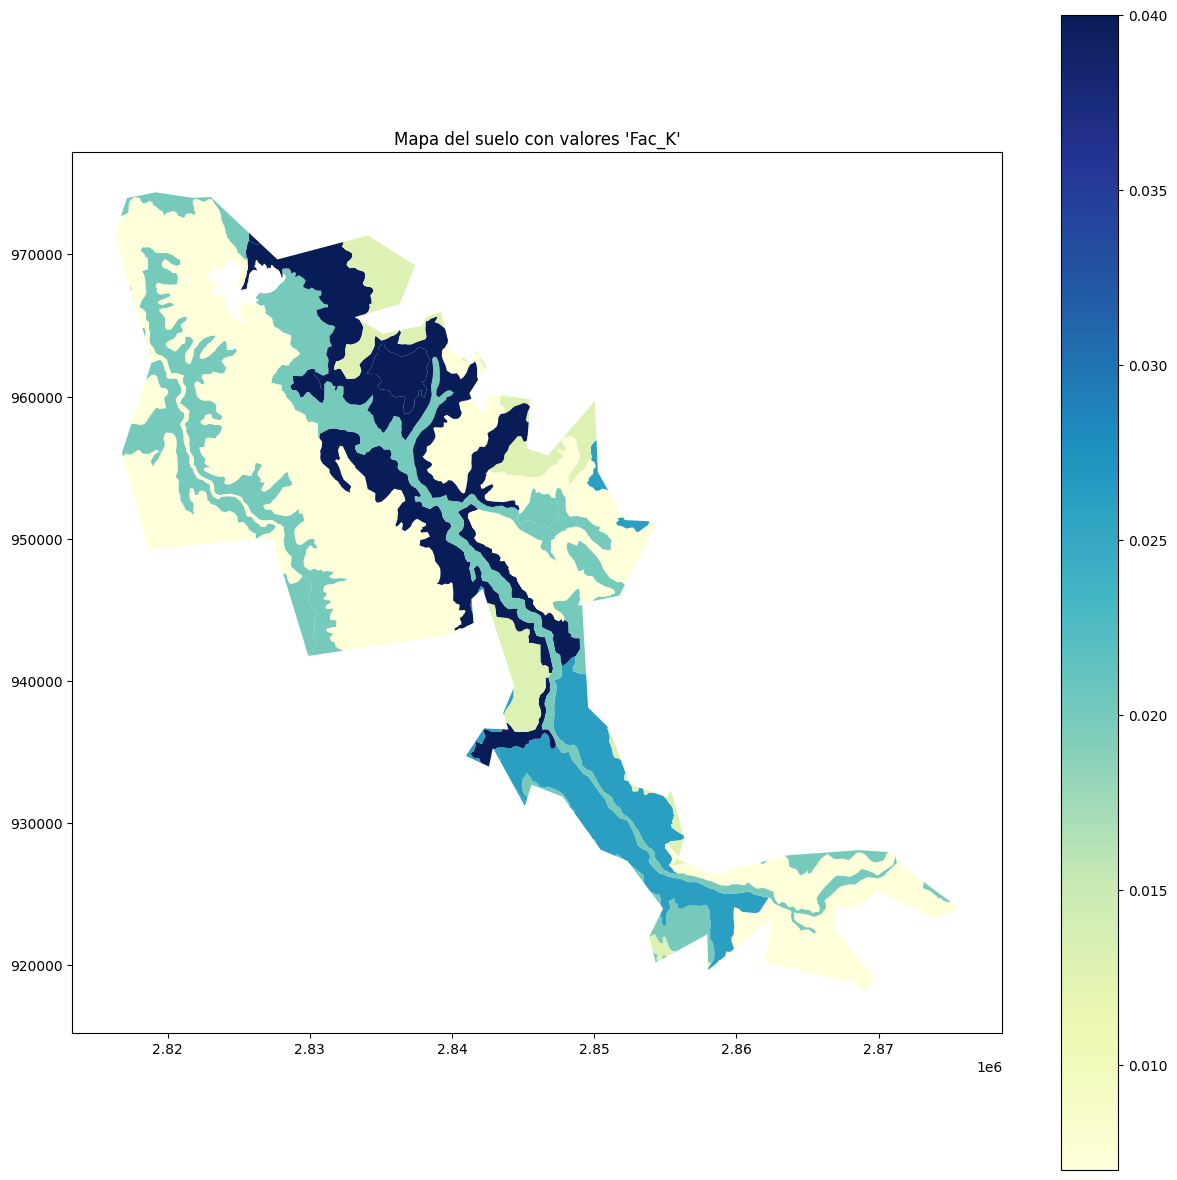

Shapefile actualizado guardado en: /content/drive/MyDrive/PlaneacioÃÅn del uso de los RN/PraÃÅcticas/CAPAS_SIG/Capas/EDA_METZ_250000_actualizado.shp


In [ ]:
#Calcular K
ruta_shp = "/content/drive/MyDrive/PlaneacioÃÅn del uso de los RN/PraÃÅcticas/CAPAS_SIG/Capas/EDA_METZ_250000.shp"  # Introduce aqu√≠ la ruta de tu shapefile
calcular_valores_fac_k(ruta_shp)

# Factor C üå±

# Factor P üë∑

# Tasa de Erosi√≥n Anual ‚ùé

In [ ]:
# Ejemplo de uso:
shapefile_path = "/content/drive/MyDrive/PlaneacioÃÅn del uso de los RN/PraÃÅcticas/CAPAS_SIG/Capas/Barranca_Metztitl¬†n_RB_PROJECT.shp"
carpeta_destino = "/content/drive/MyDrive/PlaneacioÃÅn del uso de los RN/PraÃÅcticas/CAPAS_SIG/Capas"
resolucion_pixel = 30
rasters = ["/content/drive/MyDrive/PlaneacioÃÅn del uso de los RN/PraÃÅcticas/CAPAS_SIG/Capas/PrecipitacionMediaAnual_Hidalgo.tif"]
procesar_rasters(shapefile_path, carpeta_destino, resolucion_pixel, rasters)

NameError: ignored

In [ ]:
def show_raster_info(file_path):
    # Abre el r√°ster
    with rasterio.open(file_path) as src:
        # Muestra el r√°ster
        fig, ax = plt.subplots(figsize=(10, 6))
        rshow(src, ax=ax)
        plt.show()

        # Muestra la informaci√≥n de proyecci√≥n y datum
        print("Proyecci√≥n:\n", src.crs.wkt)

        # Si el CRS tiene un datum
        if src.crs.datum:
            print("\nDatum:\n", src.crs.datum)
        else:
            print("\nEl CRS no especifica un datum expl√≠citamente.")


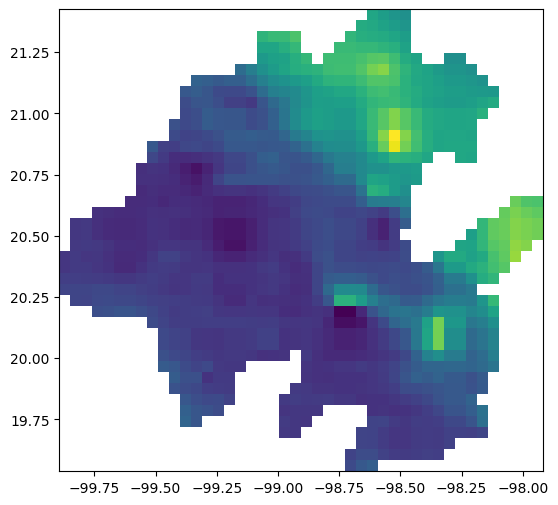

Proyecci√≥n:
 GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]


AttributeError: ignored

In [ ]:

# Especifica la ruta del archivo r√°ster aqu√≠:
file_path = "/content/drive/MyDrive/PlaneacioÃÅn del uso de los RN/PraÃÅcticas/CAPAS_SIG/Capas/PrecipitacionMediaAnual_Hidalgo.tif"
show_raster_info(file_path)